In [411]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
import plotly.express as ex
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels.api as sm

from plotly.subplots import make_subplots
from sklearn.preprocessing import scale 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from patsy import dmatrices
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import BayesianRidge

In [2]:
pd.options.display.max_columns = 200
pd.options.display.min_rows = 100

In [3]:
"""
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-09-2022.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-09-2022.csv')
"""

"\nconfirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')\ndeaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')\nlatest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-09-2022.csv')\nus_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-09-2022.csv')\n"

In [4]:
#DATA_PATH = 'data/diabetes.csv'
#diabetes = pd.read_csv(DATA_PATH)

In [5]:
#diabetes.head()

In [6]:

"""
fig = ex.scatter_matrix(diabetes,
                        dimensions=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age', 'DiabetesPedigreeFunction'],
                        #color='Outcome',
                        labels={col:col for col in diabetes.columns})
#fig.update_traces(diagonal_visible=False)
fig.show()
"""

"\nfig = ex.scatter_matrix(diabetes,\n                        dimensions=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age', 'DiabetesPedigreeFunction'],\n                        #color='Outcome',\n                        labels={col:col for col in diabetes.columns})\n#fig.update_traces(diagonal_visible=False)\nfig.show()\n"

In [7]:
"""
fig = ex.scatter(diabetes, x='Pregnancies', y='Age')
fig.show()
"""

"\nfig = ex.scatter(diabetes, x='Pregnancies', y='Age')\nfig.show()\n"

In [8]:
"""
fig = ff.create_distplot([diabetes.BMI], ['BMI'])
fig.show()
"""

"\nfig = ff.create_distplot([diabetes.BMI], ['BMI'])\nfig.show()\n"

[Polynomial Regression](#polynomial)

[Lasso Regression](#regularization)

[Ridge Regression](#regularization)

[Elastic Net Regression](#elastic-net)

[Poisson Regression](#poisson)

[Principle Components Regression](#pcm)

[Partial least Regression](#partial)

[Bayesian Linear Regression](#bayes)

<a id="polynomial"></a>

# Polynomial Regression

Polynomial regression fits non-linear relationship of x and y. It shows nth degree polynomial relationship between independent and dependent variables.
Polynomial regression is used for curvilinear relations. 

$ y = a + b1x + b2x^2 +....+ bnx^n $

In [9]:
DATA_PATH = 'data/data.csv'
poly_df = pd.read_csv(DATA_PATH)
poly_df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [10]:
fig = ex.scatter(poly_df, x='Temperature', y='Pressure')
fig.show()

In [351]:
X = poly_df.iloc[:, 1:2].values
y = poly_df.iloc[:, 2].values

In [354]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

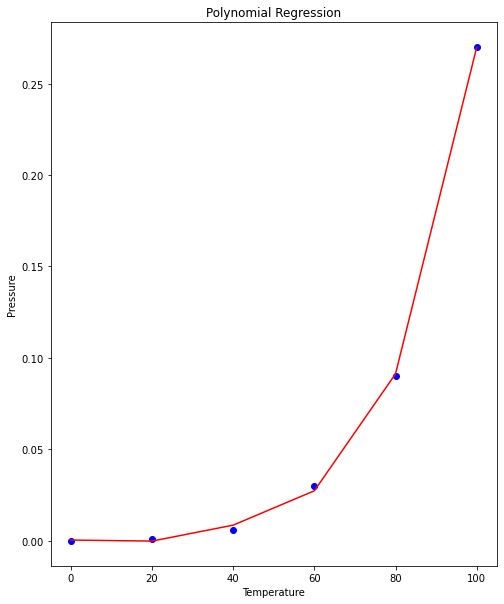

In [355]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [14]:
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([0.20675333])

<a id="ridge"></a>

# Ridge Regression

In [15]:
DATA_PATH_TRIAN = 'data/housing_train.csv'
DATA_PATH_TEST = 'data/housing_test.csv'
housing_train = pd.read_csv(DATA_PATH_TRIAN)
housing_test = pd.read_csv(DATA_PATH_TEST)

In [16]:
print(housing_test.shape)
print(housing_train.shape)

(1459, 80)
(1460, 81)


In [17]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
housing_train_blank_df = pd.DataFrame(housing_train.isna().sum())
housing_test_blank_df = pd.DataFrame(housing_test.isna().sum())
housing_train_blank_df = housing_train_blank_df.rename(columns={0:'Count'})
housing_test_blank_df = housing_test_blank_df.rename(columns={0:'Count'})

In [20]:
print(housing_train_blank_df[housing_train_blank_df['Count'] > 300])
print(housing_test_blank_df[housing_test_blank_df['Count'] > 300])

             Count
Alley         1369
FireplaceQu    690
PoolQC        1453
Fence         1179
MiscFeature   1406
             Count
Alley         1352
FireplaceQu    730
PoolQC        1456
Fence         1169
MiscFeature   1408


In [21]:
# Drop columns having more than 25% of data as Null
housing_train_df = housing_train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
housing_test_df = housing_test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [22]:
housing_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [23]:
housing_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
print(housing_train_blank_df[housing_train_blank_df['Count'] > 0])

              Count
LotFrontage     259
Alley          1369
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
PoolQC         1453
Fence          1179
MiscFeature    1406


In [25]:
print(housing_test_blank_df[housing_test_blank_df['Count'] > 0].shape)

(33, 1)


In [26]:
BLANK_COLUMNS = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [27]:
for col in housing_train_df.columns:
    if (housing_train_df[col].dtype == 'object'):
        housing_train_df[col] = housing_train_df[col].ffill()

for col in housing_test_df.columns:
    if (housing_test_df[col].dtype == 'object'):
        housing_test_df[col] = housing_test_df[col].ffill()
    if (housing_test_df[col].dtype != 'object'):
        housing_test_df[col] = housing_test_df[col].fillna(np.mean(housing_test_df[col]))

In [28]:
housing_train_df[BLANK_COLUMNS].isna().sum()

LotFrontage     259
MasVnrType        0
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
dtype: int64

In [29]:
housing_train_df['LotFrontage'] = housing_train_df['LotFrontage'].fillna(np.mean(housing_train_df['LotFrontage']))
housing_train_df['GarageYrBlt'] = housing_train_df['GarageYrBlt'].fillna(np.mean(housing_train_df['GarageYrBlt']))

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

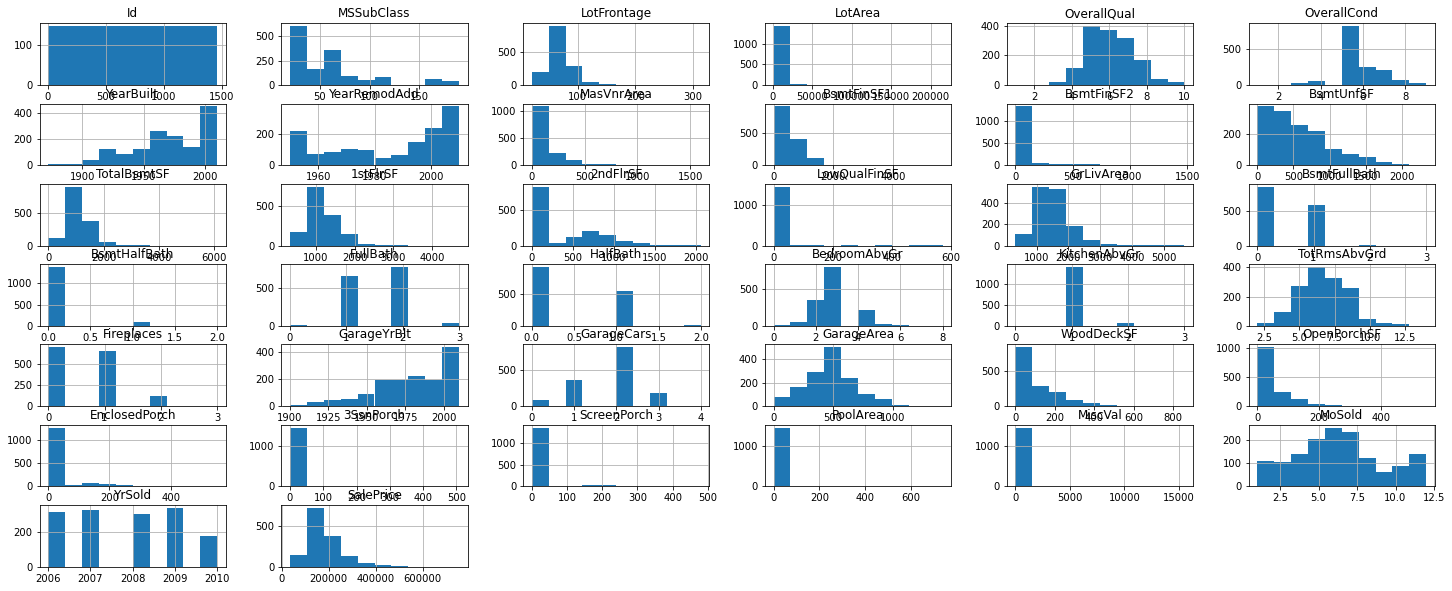

In [30]:
housing_train_df.hist(figsize=(25, 10))

In [31]:
INT_COLUMNS = housing_train_df.dtypes[housing_train_df.dtypes != 'object'].index
CAT_COLUMNS = housing_train_df.dtypes[housing_train_df.dtypes == 'object'].index.values
SKEW_COLUMNS = housing_train_df[INT_COLUMNS].apply(lambda x: skew(x))
SKEW_COLUMNS = SKEW_COLUMNS[SKEW_COLUMNS > 0.75]
SKEW_COLUMNS = SKEW_COLUMNS.index

INTT_COLUMNS = housing_test_df.dtypes[housing_test_df.dtypes != 'object'].index
CATT_COLUMNS = housing_test_df.dtypes[housing_test_df.dtypes == 'object'].index.values
SKEWT_COLUMNS = housing_test_df[INTT_COLUMNS].apply(lambda x: skew(x))
SKEWT_COLUMNS = SKEWT_COLUMNS[SKEWT_COLUMNS > 0.75]
SKEWT_COLUMNS = SKEWT_COLUMNS.index

In [32]:
SKEW_COLUMNS

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [33]:
SKEWT_COLUMNS

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [34]:
housing_train_df[SKEW_COLUMNS] = np.log1p(housing_train_df[SKEW_COLUMNS])
housing_test_df[SKEWT_COLUMNS] = np.log1p(housing_test_df[SKEWT_COLUMNS])

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

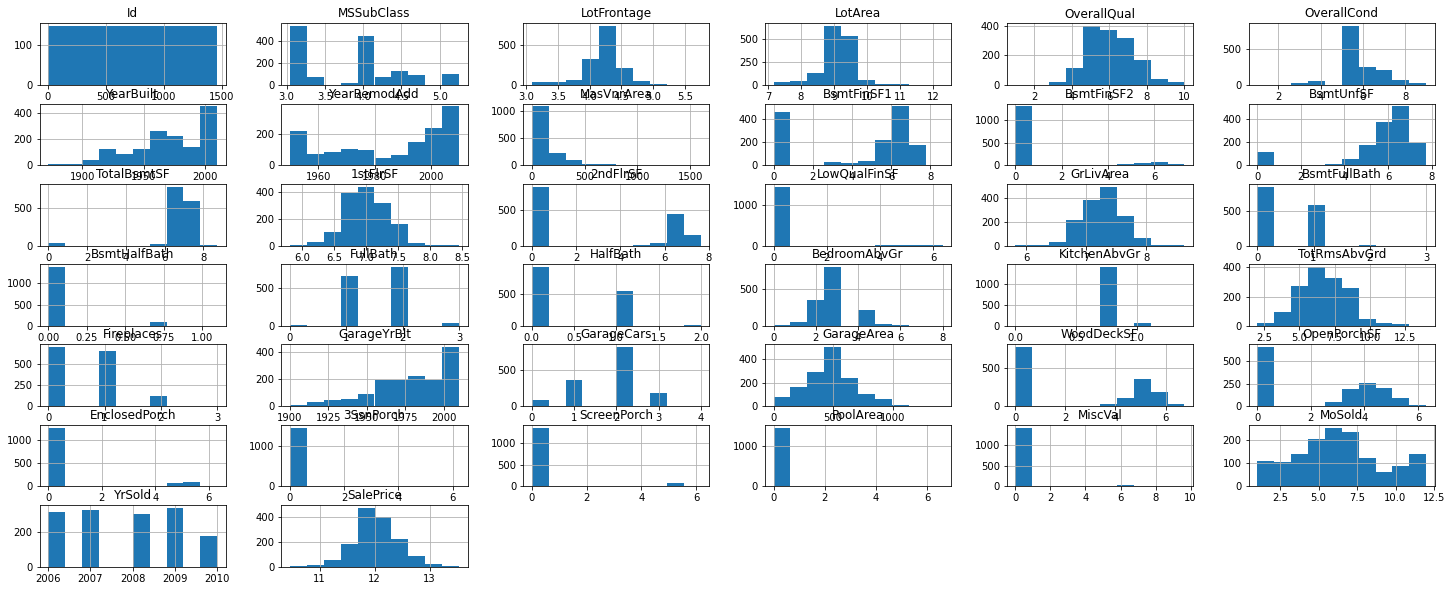

In [35]:
housing_train_df.hist(figsize=(25, 10))

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

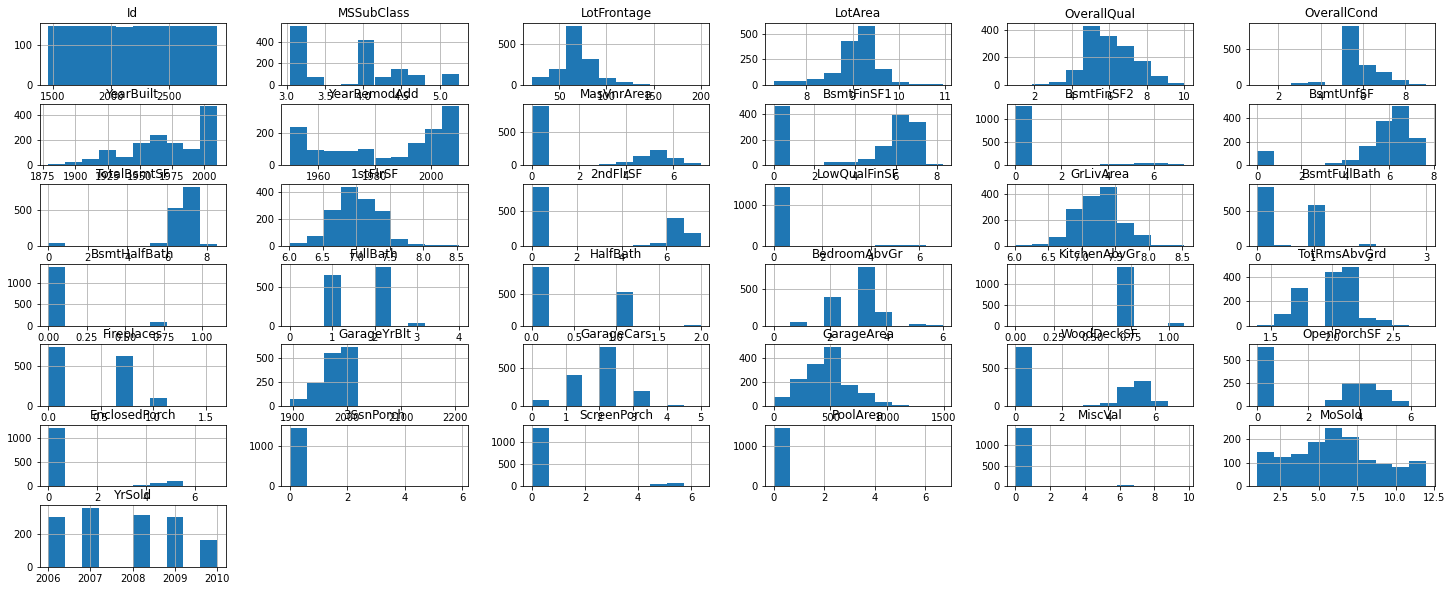

In [36]:
housing_test_df.hist(figsize=(25,10))

In [37]:
le = LabelEncoder()
housing_train_df[CAT_COLUMNS] = housing_train_df[CAT_COLUMNS].apply(le.fit_transform)

le1 = LabelEncoder()
housing_test_df[CATT_COLUMNS] = housing_test_df[CATT_COLUMNS].apply(le1.fit_transform)

In [38]:
housing_train_df[CAT_COLUMNS].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [365]:
housing_train_df.shape

(1452, 76)

In [82]:
housing_train_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,3.818794,3.028767,4.217092,9.110966,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,1.760274,103.685262,2.539726,3.733562,1.396575,2.259589,2.808904,2.269863,2.729452,4.229731,4.712329,0.655398,5.648378,6.750560,1.036301,1.538356,0.934932,3.682192,7.008452,2.864586,0.099814,7.268512,0.425342,0.039486,1.565068,0.382877,2.866438,0.711673,2.339726,6.517808,5.749315,0.613014,2.292466,1978.506164,1.184247,1.767123,472.980137,3.858904,3.900685,1.856164,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,6.321918,2007.815753,7.513014,3.770548,12.024057
std,421.610009,0.688354,0.632017,0.314733,0.517369,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.615148,181.066207,0.693995,0.731807,0.722394,0.866961,0.667304,1.144667,1.830017,2.992052,0.927524,1.845045,1.854020,1.145712,0.295124,1.739524,0.246731,1.051301,0.317431,3.293311,0.747354,0.333303,0.518911,0.162599,0.550916,0.502885,0.815778,0.089268,0.830161,1.625393,0.979659,0.644666,1.787574,23.994583,0.810079,0.747315,213.804841,0.621157,0.518737,0.496592,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,2.703626,1.328095,1.552100,1.100854,0.399449
min,1.000000,3.044522,0.000000,3.091042,7.170888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,10.460271
25%,365.750000,3.044522,3.000000,4.110874,8.929898,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.

In [87]:
housing_train_df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,3,4.189655,9.04204,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,6.561031,5,0.0,5.01728,6.753438,1,0,1,4,6.753438,6.751101,0.0,7.444833,1,0.0,2,1,3,0.693147,2,8,6,0,1,2003.0,1,2,548,4,4,2,0.0,4.127134,0.0,0.0,0.0,0.0,0.0,2,2008,8,4,12.247699


In [115]:
housing_train_df = housing_train_df[~housing_train_df.isin([np.nan, np.inf, -np.inf]).any(1)]
housing_test_df = housing_test_df[~housing_test_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [116]:
housing_train_df.shape

(1452, 76)

In [117]:
housing_test_df.shape

(1459, 75)

<a id = "regularization"></a>
# RIDGE and LASSO Regression

Regularization: There are two types of Regularization, L1 regularization & L2 regularization.

1. L1 (Lasso) regularization adds an L1 penalty equal to the value of coefficients to restrict the size of coefficients, which leads to the removal of some coefficients.

2. L2 regularization adds a penalty L2 which is equal to the square of coefficients.

Ridge regression technique is applied when the independent variables are highly correlated.

When multicollinearity occurs, least squares estimates are unbiased because their variances are sifnificant enough to diverge them from actual values.
A degree of bias is added to the regression estimates and as a result, ridge regression reduces the standard errors.

As with ridge regression, the lasso (Least Absolute Shrinkage and Selection Operator) technique penalizes the absolute magnitude of the regression coefficient.


In [357]:
x_train = housing_train_df.iloc[:,:-1][:1200]
x_test = housing_train_df.iloc[:,:-1][1200:]
y_train = housing_train_df.SalePrice.values[:1200]
y_test = housing_train_df.SalePrice.values[1200:]
"""
X = housing_train_df.iloc[:,:-1]
y = housing_train_df.SalePrice
"""
cv = 5
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

In [169]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [175]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [176]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

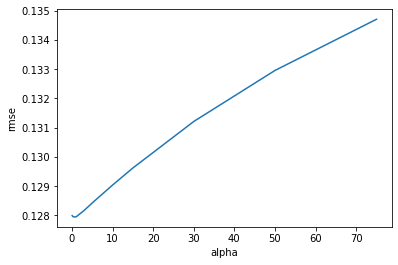

In [177]:
plt.plot(alphas, cv_ridge)
plt.xlabel("alpha")
plt.ylabel("rmse")

In [241]:
ridge = Ridge()  # same as Ridge(alpha=1)
ridge.fit(x_train, y_train, 20)
theta_ridge_ne_2 = np.array([ridge.intercept_, ridge.coef_[0]])
print(theta_ridge_ne_2)
pred = ridge.predict(x_test)
x_pred = ridge.predict(x_train)
r_score = r2_score(y_test,pred)
print("r2 score is : ", r_score)
r_score_x = r2_score(y_train, x_pred)
print("x_train r2 score is : ", r_score_x)
print("mean_sqrd_error is : ",mean_squared_error(y_test,pred))
print("root_mean_squared error of is : ", np.sqrt(mean_squared_error(y_test,pred)))

[1.79648457e+01 3.70721483e-06]
r2 score is :  0.7960728607456367
x_train r2 score is :  0.9143645934478993
mean_sqrd_error is :  0.02892295494597765
root_mean_squared error of is :  0.17006750114580285


In [229]:
alphas = [1.5]
ridge_model = RidgeCV(alphas=alphas, cv=cv, scoring = 'neg_mean_absolute_error')
ridge_model.fit(x_train, y_train)
ridge_model.alpha_
predictions = ridge_model.predict(x_test)
x_predictions = ridge_model.predict(x_train)

In [230]:
r_score = r2_score(y_test,predictions)
print("r2 score is : ", r_score)
r_score_x = r2_score(y_train, x_predictions)
print("x_train r2 score is : ", r_score_x)
print("mean_sqrd_error is : ",mean_squared_error(y_test,predictions))
print("root_mean_squared error of is : ", np.sqrt(mean_squared_error(y_test,predictions)))

r2 score is :  0.7949543964840389
x_train r2 score is :  0.9140389928972898
mean_sqrd_error is :  0.029081586561000357
root_mean_squared error of is :  0.17053324180640078


In [210]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
lr_prediction =  LR.predict(x_test)
lr_x_prediction = LR.predict(x_train)
lr_score = r2_score(y_test,lr_prediction)
lr_x_score = r2_score(y_train,lr_x_prediction)
print("r2 score is : ", lr_score)
print("r2 x score is : ", lr_x_score)
print("mean_sqrd_error is : ",mean_squared_error(y_test,lr_prediction))
print("root_mean_squared error of is : ", np.sqrt(mean_squared_error(y_test,lr_prediction)))

r2 score is :  0.796125285444018
r2 x score is :  0.9143656044580796
mean_sqrd_error is :  0.02891551955903072
root_mean_squared error of is :  0.1700456396354541


In [232]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)
print(rmse_cv(model_lasso).mean())


0.1279494512326589


In [233]:
coef = pd.Series(model_lasso.coef_, index = x_train.columns)

In [235]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 67 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

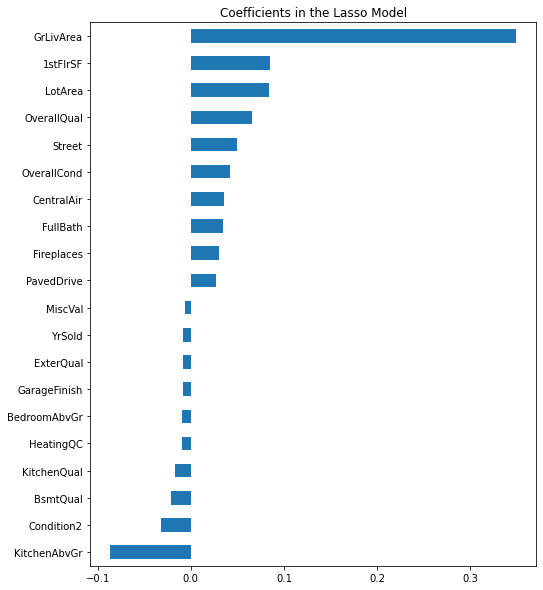

In [238]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

<a id="elastic-net"></a>

# Elasticnet Regression

Elastic net regression combines ridge and lasso regression techniques that are particularly useful when dealing with strongly correlated data. It regularizes regression models by utilizing the penalties associated with the ridge and lasso regression methods.

Regularization for Elastic Net Regression:

$ regularization\_component = (\alpha * l1\_penalty) + ((1 – \alpha) * l2\_penalty $

$ elastic-net-loss = loss + (\alpha * regularization\_component) $

For example, an alpha of 0.5 would provide a 50 percent contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

$\alpha$ is lambda

In [410]:
elastic_net_model = ElasticNet(alpha=0.2, l1_ratio=0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
elastic_net_model.fit(x_train, y_train)
# evaluate model
scores = cross_val_score(elastic_net_model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

elastic_net_predictions = elastic_net_model.predict(x_test)

elastic_net_lr_score = r2_score(y_test,elastic_net_predictions)

print(f"Elastic Net r2 score is : {elastic_net_lr_score}")
print(f"Elastic Net Mean squared score is :{mean_squared_error(y_test,elastic_net_predictions)}")
print(f"Elastic Net RMSE score is : {np.sqrt(mean_squared_error(y_test,elastic_net_predictions))}")


Mean MAE: 0.100 (0.009)
Elastic Net r2 score is : 0.7958726052169234
Elastic Net Mean squared score is :0.028951357156962596
Elastic Net RMSE score is : 0.1701509834146209


<a id = "pcm"></a>

# Principal Component Regression

PC Regression is useful:

1. When the independent variables are highly correlated and multicollinearity can become a problem. This can cause the coefficient estimates of the model to be unreliable and have high variance.

Instead of using independent variables straight in regression we get principal components from the variables and used for regression.

In [344]:
pca_model = PCA()
x_train_reduced = pca_model.fit_transform(x_train)
x_test_reduced = pca_model.transform(x_test)

Text(0.5, 1.0, 'MSE with respect to every feature')

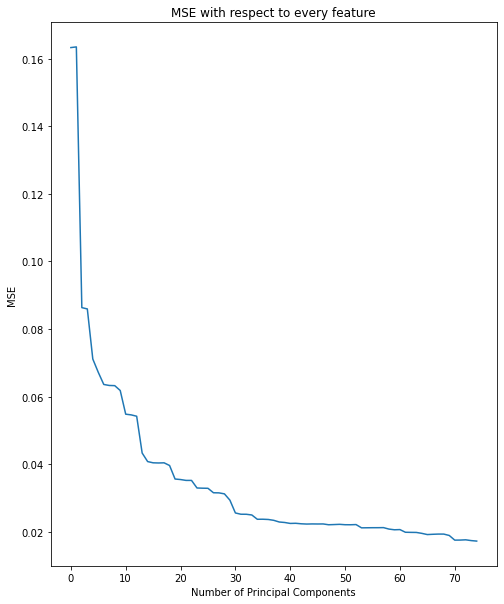

In [341]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []
# Calculate MSE with only the intercept
score = -cross_val_score(regr,
           np.ones((len(x_train_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in range(1, len(x_train.columns)):
    score = -cross_val_score(regr,
               x_train_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MSE with respect to every feature')

In [370]:
#x_train_reduced = pca_model.fit_transform(scale(x_train))
#x_test_reduced = pca_model.transform(scale(x_test))

#train PCR model on training data 
regr = LinearRegression()
regr.fit(x_train_reduced, y_train)

#calculate RMSE
pred_pca = regr.predict(x_test_reduced)
print(f"MSE for pca model : {mean_squared_error(y_test, pred_pca)}")
print(f"RMSE for pca model : {np.sqrt(mean_squared_error(y_test, pred_pca))}")

MSE for pca model : 0.02891551955902954
RMSE for pca model : 0.17004563963545063


<a id="partial"></a>

# Partial Least Square Regression

Partial Least Squares is another solution for handling multicollinearity problem of data. It allows to reduce the dimensionality of correlated variables. 

How it is different than PCR?
PCR uses PCA to reduce dimensionality.  In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. Whereas, PLSR uses the information of target to reduce the dimensionality.

Another difference between Partial Least Squares and Principal Components Regression is that Principal Components Regression focuses on variance while reducing dimensionality. Partial Least Squares on the other hand focuses on covariance while reducing dimensionality.

So PLSR can outperform PCR when the target is strongly correlated with some directions(independent) in the data that have a low variance.

A second large advantage of Partial Least Squares is that it is a method that can model multiple outcome variables. Many statistics and Machine Learning models cannot deal directly with multiple outcome variables.

[0.027102250983981623]


Text(0.5, 1.0, 'MSE for PLS')

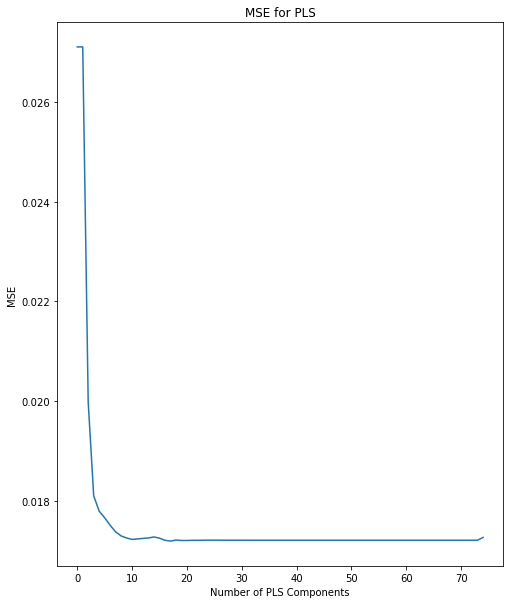

In [384]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(x_train)

# Calculate MSE with only the intercept
score = -cross_val_score(PLSRegression(n_components=1, scale=True),
           x_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)
print(mse)

# Calculate MSE using cross-validation, adding one component at a time
for i in range(1, len(x_train.columns)):
    pls = PLSRegression(n_components=i)
    score = -cross_val_score(pls, scale(x_train), y_train, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('MSE for PLS')




In [407]:
pls = PLSRegression(n_components=21)
pls.fit(scale(x_train), y_train)
pls_predicts = pls.predict(scale(x_test))
print(f"r2 score for PLSR : {r2_score(y_test, pls_predicts)}")
print(f"MSE for PLSR : {mean_squared_error(y_test, pls_predicts)}")
print(f"RMSE for PLSR : {np.sqrt(mean_squared_error(y_test, pls_predicts))}")

r2 score for PLSR : 0.8043634405174048
MSE for PLSR : 0.027747103285960042
RMSE for PLSR : 0.16657461777221655


<a id="bayes"></a>
# Bayesian Linear Regression

Bayesion Linear Regression is used when the data points are less and distribution is not normal.
In the Bayesian viewpoint, we formulate linear regression using probability distributions rather than point estimates. The response, y, is not estimated as a single value, but is assumed to be drawn from a probability distribution. The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters.

In [413]:
model = BayesianRidge()
model.fit(x_train, y_train)
# Model making a prediction on test data
bayes_prediction = model.predict(x_test)
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, bayes_prediction)}")
print(f"MSE for Bayesian Linear Regression : {mean_squared_error(y_test, bayes_prediction)}")
print(f"RMSE for Bayesian Linear Regression : {np.sqrt(mean_squared_error(y_test, bayes_prediction))}")

r2 Score Of Test Set : 0.79391570211089
MSE for Bayesian Linear Regression : 0.029228904424954457
RMSE for Bayesian Linear Regression : 0.17096462916332858


<a id="poisson"></a>
# Poisson Regression

Poisson regression is used when dependent variable y has poisson distribution. It is used generally to forecast count for dependent variable.
Count based data contains events that occur at a certain rate. The rate of occurrence may change over time or from one observation to next.

For example:

Number of customer calls for a particular product.

Number of vehicles crossing an intersection per hour

The Poisson regression model and the Negative Binomial regression model are two popular techniques for developing regression models for counts. Other possibilities are Ordered Logit, Ordered Probit and Nonlinear Least Squares models.



In [243]:
bicyclist_df = pd.read_csv('data/poisson_bicyclist_counts.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [244]:
bicyclist_df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


In [245]:
ds = bicyclist_df.index.to_series()
bicyclist_df['MONTH'] = ds.dt.month
bicyclist_df['DAY_OF_WEEK'] = ds.dt.dayofweek
bicyclist_df['DAY'] = ds.dt.day

In [269]:
bicyclist_df.shape

(214, 7)

In [284]:
train = bicyclist_df[(bicyclist_df.MONTH >=4) & (bicyclist_df.MONTH <= 9)]
test = bicyclist_df[bicyclist_df.MONTH == 10]
x_poi_train = train.loc[:, train.columns != 'BB_COUNT']
y_poi_train = train.BB_COUNT
x_poi_test = test.loc[:, test.columns != 'BB_COUNT']
y_poi_test = test.BB_COUNT

In [285]:
poisson_model = sm.GLM(y_poi_train, x_poi_train, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  183
Model:                            GLM   Df Residuals:                      177
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4748e+05
Date:                Fri, 30 Dec 2022   Deviance:                   2.9319e+05
Time:                        17:30:14   Pearson chi2:                 5.12e+05
No. Iterations:                     6   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
HIGH_T          0.0970      0.000    284.277      

/home/neeraj/miniconda3/envs/ml-with-python/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning:

overflow encountered in exp



In [286]:
poisson_predictions = poisson_model.get_prediction(x_poi_test)
possion_pred_summary = poisson_predictions.summary_frame()
print(possion_pred_summary[:5])
print(len(possion_pred_summary))

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2017-10-01  1354.202699   8.654666    1337.345663    1371.272216
2017-10-02  1644.631193  10.712766    1623.768018    1665.762431
2017-10-03  1337.224378   6.615117    1324.321640    1350.252826
2017-10-04  2339.570039  12.966521    2314.293658    2365.122485
2017-10-05  4303.028617  18.775980    4266.385287    4339.986671
31


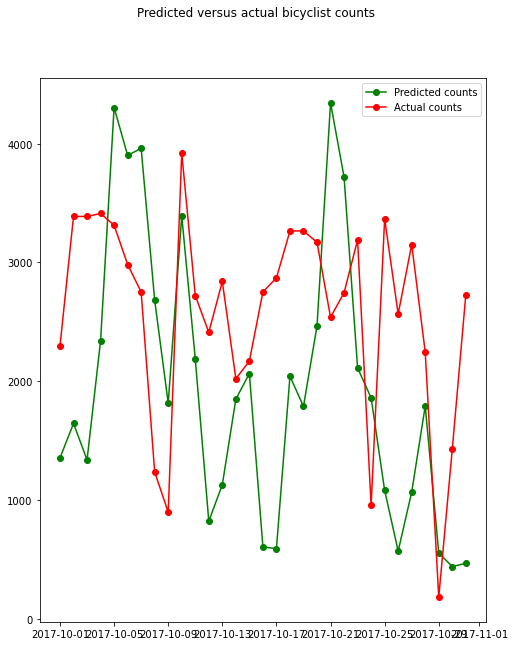

In [287]:
predicted_counts=possion_pred_summary['mean']
actual_counts = y_poi_test
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts')
predicted, = plt.plot(x_poi_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_poi_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()